FacetGrid

FacetGrid -  это класс в библиотеке seaborn, который используется для создания многофакторных сеток графиков, что позволяет визуализировать распределение данных и их взаимосвязь в различных подгруппах. 
Этот класс предоставляет высокоуровневый интерфейс для построения сложных графиков с разбивкой данных по категориям.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class seaborn.FacetGrid(data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None)

Основные параметры FacetGrid:

1) data: DataFrame, содержащий данные для визуализации;
2) row, col, hue: переменные для создания строк, столбцов и цветовой кодировки;
3) col_wrap: количество столбцов перед переносом на новую строку;
4) sharex, sharey: синхронизация осей X и Y между графиками;
5) height: высота каждой панели в дюймах;
6) aspect: соотношение сторон каждой панели;
7) palette: палитра цветов для различных значений переменной hue;
8) row_order, col_order, hue_order: порядок значений для соответствующих переменных;
9) margin_titles: позволяет разносить заголовки по разным осям;
10) xlim, ylim: пределы для осей X и Y;
11) subplot_kws: словарь дополнительных аргументов для подграфиков;
12) gridspec_kws: словарь дополнительных аргументов для сетки;
13) despine: удаление верхней и правой границ графиков.

Основные методы класса FacetGrid:

1) map(func, *args, **kwargs): наносит указанную функцию визуализации на каждый график в сетке;
2) map_dataframe(func, *args, **kwargs): наносит функцию визуализации, которая принимает DataFrame и аргументы;
3) add_legend(title=None, label_order=None): добавляет легенду к графикам;
4) set_titles(template=None, row_template=None, col_template=None): устанавливает заголовки для подгрупп;
5) set_axis_labels(x_var, y_var): устанавливает метки осей;
6) set_xlabels(label=None, clear_inner=True): Устанавливает метки осей X;
7) set_ylabels(label=None, clear_inner=True): Устанавливает метки осей Y;
8) tight_layout(*args, **kwargs): Подгоняет макет, чтобы устранить перекрытие;
9) savefig(*args, **kwargs): Сохраняет график в файл.


Замечание:
Особенность метода map() заключается в том, что он не поддерживает передачу именованных аргументов. Например, если попытаться передать ему аргумент x='tip', это вызовет ошибку.

В отличие от метода map(), метод map_dataframe() класса FacetGrid не имеет такого ограничения и поддерживает использование именованных аргументов. 

Метод figure.subplots_adjust() в контексте использования с FacetGrid позволяет настраивать отступы и расстояния между подграфиками, создаваемыми FacetGrid.

Метод subplots_adjust() принимает следующие параметры:

1) left: отступ слева от области рисования подграфиков в долях от ширины фигуры (от 0 до 1);
2) bottom: отступ снизу от области рисования подграфиков в долях от высоты фигуры (от 0 до 1);
3) right: отступ справа от области рисования подграфиков в долях от ширины фигуры (от 0 до 1);
4) top: отступ сверху от области рисования подграфиков в долях от высоты фигуры (от 0 до 1);
5) wspace: расстояние по горизонтали между подграфиками в долях от ширины подграфика;
6) hspace: расстояние по вертикали между подграфиками в долях от высоты подграфика.

Метод set_titles() класса FacetGrid используется для установки заголовков каждой из ячеек сетки. Это позволяет добавлять индивидуальные заголовки, основанные на значениях переменных, используемых для создания FacetGrid.

Параметры метода:

1) template: Строка, определяющая шаблон заголовков для всех подграфиков. По умолчанию '{col_name} | {row_name}', где {col_name} и {row_name} будут заменены на соответствующие значения.
2) row_template: Строка, определяющая шаблон заголовков для строк сетки. Переопределяет шаблон template для строк.
3) col_template: Строка, определяющая шаблон заголовков для столбцов сетки. Переопределяет шаблон template для столбцов.

In [3]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


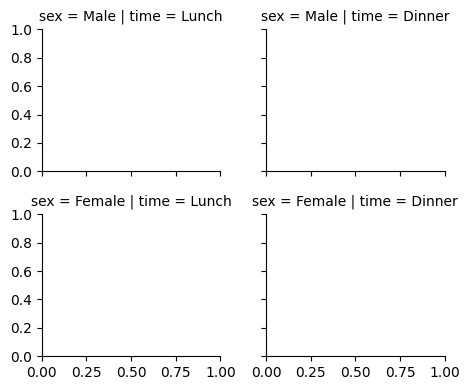

In [13]:
sns.FacetGrid(tips, 
              col='time',
              row='sex',
              aspect=1.2,
              height=2);

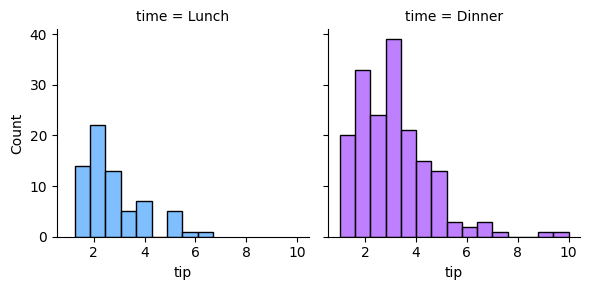

In [39]:
g = sns.FacetGrid(tips, 
                  col='time',
                  hue='time',
                  palette='cool',
                  height=3)

g.map(sns.histplot, 'tip');

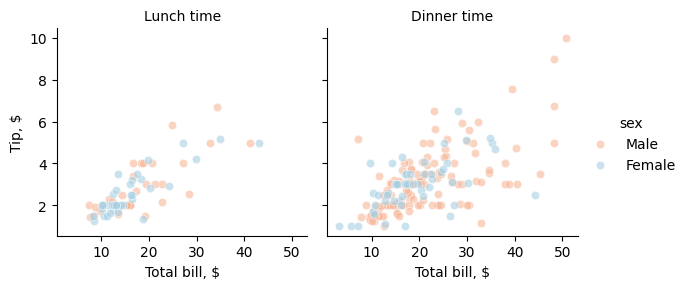

In [75]:
g = sns.FacetGrid(tips, 
                  col='time',
                  hue='sex',
                  palette='RdBu')

g.map_dataframe(sns.scatterplot, x='total_bill', y='tip',
                alpha=0.6)
g.add_legend()
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}');

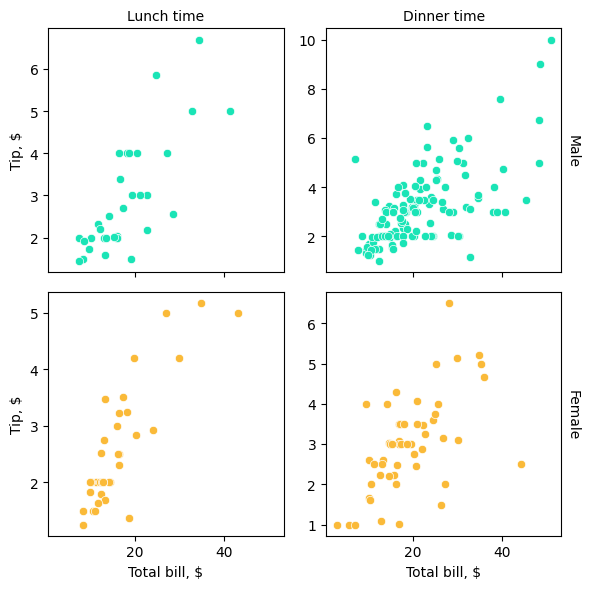

In [89]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette='turbo', 
                  margin_titles=True,
                  despine=False,
                  sharey=False,
                  sharex=True)

g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}');

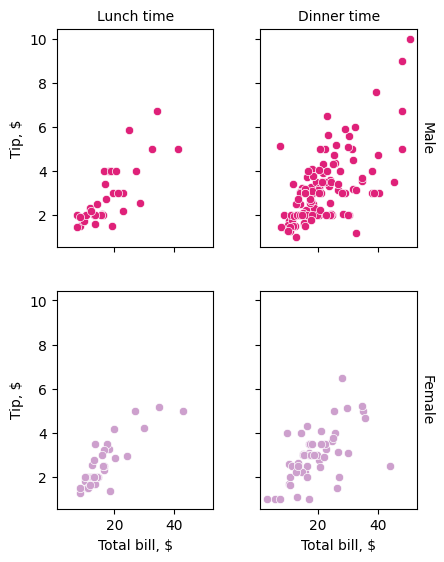

In [103]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette='PuRd_r', 
                  margin_titles=True,
                  despine=False)

g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}')
g.figure.subplots_adjust(left=0.3, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.2);